In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

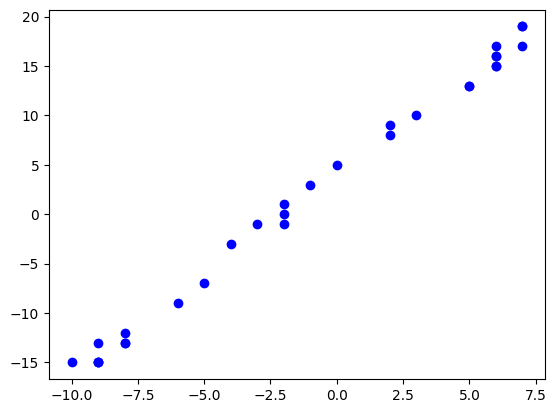

In [3]:
w = 2
b = 3
xlim = [-10, 10]
x_train = np.random.randint(low=xlim[0], high=xlim[1], size=30)

y_train = [w * x + b + random.randint(0, 2) for x in x_train]

plt.plot(x_train, y_train, 'bo')

In [4]:
import torch
import torch.nn as nn


class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, input):
        return (input * self.weight) + self.bias

In [6]:
model = LinearModel()
x = torch.tensor(3)
y = model(x)

In [9]:
model = LinearModel()

# 定义优化器
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)

y_train = torch.tensor(y_train, dtype=torch.float32)

# 训练模型
for epoch in range(1000):
    input = torch.from_numpy(x_train)
    output = model(input)
    loss = nn.functional.mse_loss(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/tmp/ipykernel_9/825497026.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)


In [11]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([2.0042], requires_grad=True)
Parameter containing:
tensor([3.4570], requires_grad=True)


In [12]:
class CustomLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_features, out_features))
        self.bias = nn.Parameter(torch.randn(out_features))

    def forward(self, input):
        return input @ self.weight + self.bias

In [15]:
print(model.state_dict())
torch.save(model.state_dict(), './data/linear_model.pth')

OrderedDict([('weight', tensor([2.0042])), ('bias', tensor([3.4570]))])


In [16]:
# 定义网络结构
linear_model = LinearModel()
# 加载保存的参数
linear_model.load_state_dict(torch.load('./data/linear_model.pth'))
linear_model.eval()
for param in linear_model.parameters():
    print(param)

Parameter containing:
tensor([2.0042], requires_grad=True)
Parameter containing:
tensor([3.4570], requires_grad=True)


In [22]:
import os

os.environ['TORCH_HOME'] = './data'  # 修改存储目录

import torch

print(torch.hub.get_dir())  # 默认是 ~/.cache/torch

./data/hub


In [43]:
import torchvision.models as models

alexnet = models.alexnet(pretrained=True)

In [47]:
from PIL import Image
import torchvision
from torchvision import transforms

im = Image.open('./data/images/dog.jpg')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_tensor = transform(im).unsqueeze(0)
alexnet.eval()
alexnet(input_tensor).argmax()

tensor(263)

In [27]:
cifar10_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor(),
                                               target_transform=None, download=True)

Using downloaded and verified file: ./data/cifar-10-python.tar.gz
Extracting ./data/cifar-10-python.tar.gz to ./data


torch.Size([48, 3, 32, 32])


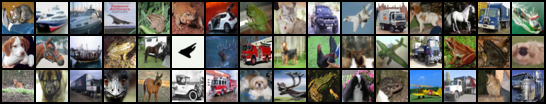

In [30]:
from torch.utils.data import DataLoader

tensor_dataloader = DataLoader(cifar10_dataset, batch_size=48)

data_iter = iter(tensor_dataloader)
images, labels = next(data_iter)
print(images.shape)

grid_tensor = torchvision.utils.make_grid(images, nrow=16, padding=2)
grid_img = transforms.ToPILImage()(grid_tensor)
grid_img.show()

In [31]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [32]:
# 提取分类层的输入参数
fc_in_features = alexnet.classifier[6].in_features

# 修改与训练模型的输出分类数
alexnet.classifier[6] = nn.Linear(fc_in_features, 10)

print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [45]:
transform = transforms.Compose([
    transforms.RandomResizedCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
cifar10_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform,
                                               target_transform=None, download=True)

dataloader = DataLoader(cifar10_dataset, batch_size=32, shuffle=True, num_workers=0)

Files already downloaded and verified


In [46]:
optimizer = torch.optim.SGD(alexnet.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)

In [48]:
# 训练3个Epoch
for epoch in range(3):
    for item in dataloader:
        output = alexnet(item[0])
        target = item[1]
        # 使用交叉熵损失函数
        loss = nn.CrossEntropyLoss()(output, target)
        print('Epoch {}, Loss {}'.format(epoch + 1, loss))
        #以下代码的含义，我们在之前的文章中已经介绍过了
        alexnet.zero_grad()
        loss.backward()
        optimizer.step()

Epoch 1, Loss 11.390161514282227
Epoch 1, Loss 11.10473346710205
Epoch 1, Loss 9.650487899780273
Epoch 1, Loss 8.740126609802246
Epoch 1, Loss 8.255596160888672
Epoch 1, Loss 8.651772499084473
Epoch 1, Loss 7.846767425537109
Epoch 1, Loss 7.975433826446533
Epoch 1, Loss 7.931630611419678
Epoch 1, Loss 7.305787563323975
Epoch 1, Loss 7.42929744720459
Epoch 1, Loss 7.351666450500488
Epoch 1, Loss 7.194794178009033
Epoch 1, Loss 6.7262864112854
Epoch 1, Loss 7.113491535186768
Epoch 1, Loss 6.258823394775391
Epoch 1, Loss 6.161075115203857
Epoch 1, Loss 6.2522382736206055
Epoch 1, Loss 5.654983997344971
Epoch 1, Loss 5.217900276184082
Epoch 1, Loss 4.8547234535217285
Epoch 1, Loss 5.045372486114502
Epoch 1, Loss 5.413811206817627
Epoch 1, Loss 5.163278579711914
Epoch 1, Loss 5.05932092666626
Epoch 1, Loss 4.755397796630859
Epoch 1, Loss 5.098104476928711
Epoch 1, Loss 4.68168830871582
Epoch 1, Loss 4.83888578414917
Epoch 1, Loss 4.25895357131958
Epoch 1, Loss 4.044596195220947
Epoch 1, Los